In [1]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

In [2]:
from evrp_gdg.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str, convert_txt_instances_to_csv
from evrp_gdg.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp_gdg.milp.evrptw import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

 # Full solve

Objective options: {Schneider} OR {OpEx CapEx Cycle EA DCM Delivery}

Constraint options: {Start=End FullStart=End NoXkappaBounds NoMinVehicles NoSymmetry NoXd}

In [3]:
# instance = 'c101C10_'
# instance = 'c103C5_'
# instance = 'c106C15_e'
instance = 'r105C5_e'
fpath = 'config/test_instances/' + instance + '.csv'

In [4]:
m = EVRPTW(problem_type='Schneider')
m.full_solve(fpath)

2021-05-03 19:24:51 INFO     Building abstract model
2021-05-03 19:24:51 INFO     Defining parameters and sets
2021-05-03 19:24:51 INFO     Defining variables
2021-05-03 19:24:51 INFO     Defining constraints
2021-05-03 19:24:51 INFO     Importing EVRPTW MILP instance: r105C5_e
2021-05-03 19:24:51 INFO     Reading CSV
2021-05-03 19:24:51 INFO     Creating graph
2021-05-03 19:24:51 INFO     Creating timeseries data
2021-05-03 19:24:51 INFO     Creating duplicates and extended graph
2021-05-03 19:24:52 INFO     Using Scipy euclidian distances to generate distance matrix
2021-05-03 19:24:52 INFO     Calculating distance matrix
2021-05-03 19:24:52 INFO     Creating parameters
2021-05-03 19:24:52 INFO     Creating instance
2021-05-03 19:24:53 INFO     Problem type: Schneider
2021-05-03 19:24:53 INFO     Solving instance...


Using license file C:\gurobi910\win64\gurobi.lic
Academic license - for non-commercial use only - expires 2021-06-13
Read LP format model from file C:\Users\berwa\AppData\Local\Temp\tmpqwdxqblq.pyomo.lp
Reading time = 0.21 seconds
x452: 3172 rows, 452 columns, 16045 nonzeros
Changed value of parameter TimeLimit to 3600.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3172 rows, 452 columns and 16045 nonzeros
Model fingerprint: 0xdbff2cb0
Variable types: 181 continuous, 271 integer (271 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 1176 rows and 45 columns
Presolve time: 0.51s
Presolved: 1996 rows, 407 columns, 13914 nonzeros
Variable types: 167 continuous, 240 integer (240 binary)
Found heuristic so

2021-05-03 19:26:13 INFO     Done


In [54]:
# m = EVRPTW(problem_type='Distance OpEx CapEx Cycle EA DCM Delivery')
# m.full_solve(fpath)

In [19]:
# print(m.results)

In [8]:
x = getattr(m.instance, 'xgamma')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('D0', 'C98'), 1.0),
 (('D0', 'C65'), 1.0),
 (('S0_0', 'C24'), 1.0),
 (('C20', 'D1'), 1.0),
 (('C98', 'S0_0'), 1.0),
 (('C65', 'C57'), 1.0),
 (('C57', 'D1'), 1.0),
 (('C24', 'C20'), 1.0)]

In [9]:
x = getattr(m.instance, 'xkappa')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('S0_0', 152), 1.0),
 (('S0_0', 156), 1.0),
 (('S0_0', 160), 1.0),
 (('S0_0', 164), 1.0),
 (('S0_0', 168), 1.0),
 (('S0_0', 172), 1.0),
 (('S0_0', 176), 1.0),
 (('S0_0', 180), 1.0),
 (('S0_0', 184), 1.0),
 (('S0_0', 188), 1.0),
 (('S0_0', 192), 1.0),
 (('S0_0', 196), 1.0),
 (('S0_0', 200), 1.0),
 (('S0_0', 204), 1.0),
 (('S0_0', 208), 1.0),
 (('S0_0', 212), 1.0),
 (('S0_0', 216), 1.0),
 (('S0_0', 220), 1.0),
 (('S0_0', 224), 1.0),
 (('S0_0', 228), 1.0),
 (('S0_0', 232), 1.0),
 (('S0_0', 236), 1.0),
 (('S0_0', 240), 1.0),
 (('S0_0', 244), 1.0),
 (('S0_0', 248), 1.0),
 (('S0_0', 252), 1.0),
 (('S0_0', 256), 1.0),
 (('S0_0', 260), 1.0),
 (('S0_0', 264), 1.0),
 (('S0_0', 268), 1.0),
 (('S0_0', 272), 1.0),
 (('S0_0', 276), 1.0),
 (('S0_0', 280), 1.0),
 (('S0_0', 284), 1.0),
 (('S0_0', 288), 1.0),
 (('S0_0', 292), 1.0),
 (('S0_0', 296), 1.0),
 (('S0_0', 300), 1.0),
 (('S0_0', 304), 1.0),
 (('S0_0', 308), 1.0),
 (('S0_0', 312), 1.0),
 (('S0_0', 316), 1.0),
 (('S0_0', 320), 1.0),
 (('S0_0', 

In [10]:
m.instance.xa.pprint()

xa : Size=9, Index=V01_
    Key   : Lower : Value              : Upper : Fixed : Stale : Domain
      C20 :     0 :               10.0 :  None : False : False : NonNegativeReals
      C24 :     0 :               15.0 :  None : False : False : NonNegativeReals
      C57 :     0 :               35.0 :  None : False : False : NonNegativeReals
      C65 :     0 :   64.9437515251343 :  None : False : False : NonNegativeReals
      C98 :     0 : 30.805843601498722 :  None : False : False : NonNegativeReals
       D0 :     0 :              77.75 :  None : False : False : NonNegativeReals
       D1 :     0 :                0.0 :  None : False : False : NonNegativeReals
     S0_0 :     0 :                0.0 :  None : False : False : NonNegativeReals
    S15_0 :     0 :                0.0 :  None : False : False : NonNegativeReals


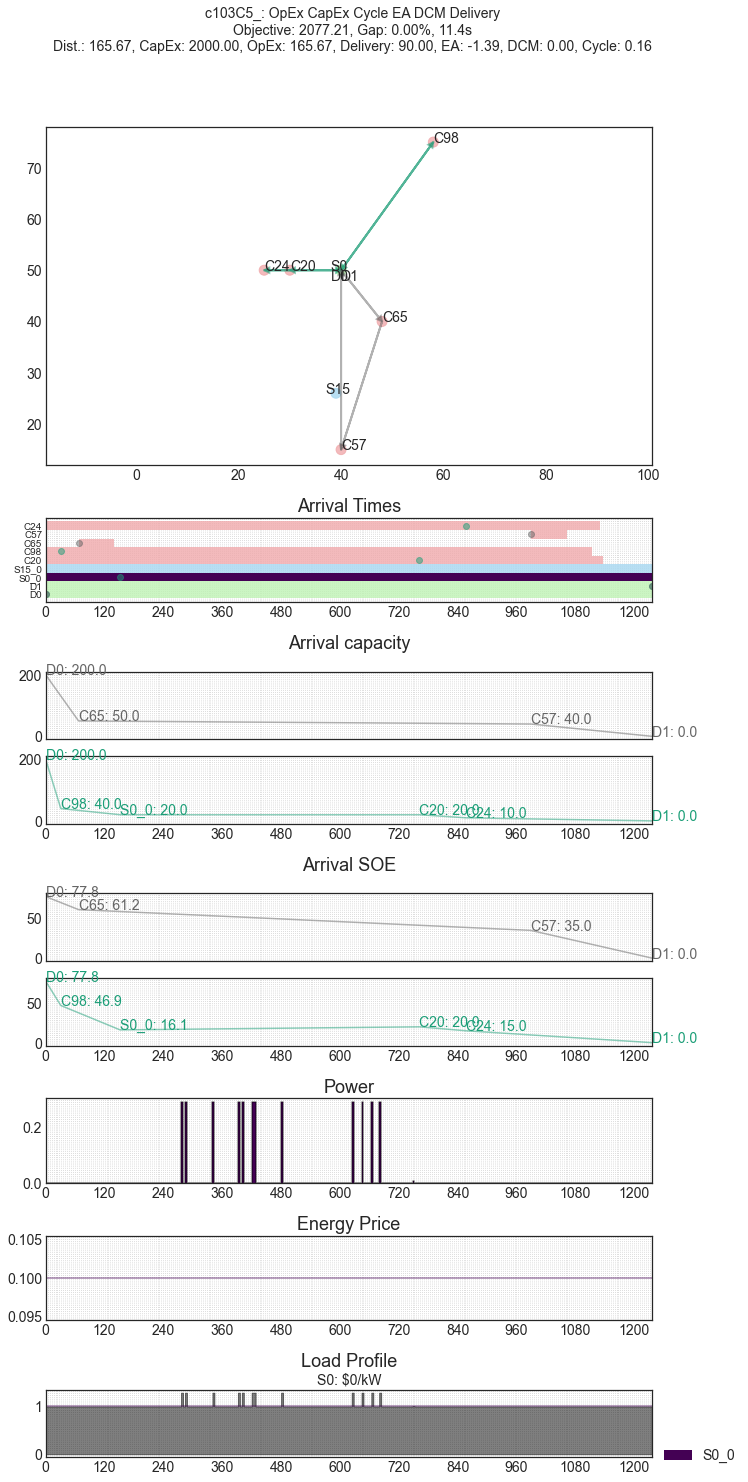

In [5]:
x, xp, traces, routes = plot_evrptwv2g(m, save=False)

In [60]:
# m.instance.T.pprint()

T : Time
    Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :  309 : {0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 700, 704, 708, 712, 716

In [6]:
routes

state           xw     xq         xa
from to                                        
D0   D0      NaN     0.000000  200.0  77.750000
     C98     1.0    30.805844   40.0  46.944156
     C65     1.0    67.000000   50.0  61.248809
C98  S0_0    1.0   151.611687   20.0  16.138313
S0_0 C20     1.0   762.000000   20.0  20.000000
C20  C24     1.0   857.000000   10.0  15.000000
C65  C57     1.0   989.000000   40.0  35.000000
C57  D1      1.0  1236.000000    0.0   0.000000
C24  D1      1.0  1236.000000    0.0   0.000000

In [5]:
x = getattr(m.instance, 'xgamma')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('D0', 'C98'), 1.0),
 (('D0', 'C65'), 1.0),
 (('S0_0', 'C20'), 1.0),
 (('C20', 'C24'), 1.0),
 (('C98', 'S0_0'), 1.0),
 (('C65', 'C57'), 1.0),
 (('C57', 'D1'), 1.0),
 (('C24', 'D1'), 1.0)]

In [7]:
x = getattr(m.instance, 'xkappa')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('S0_0', 276), 1.0),
 (('S0_0', 284), 1.0),
 (('S0_0', 340), 1.0),
 (('S0_0', 392), 1.0),
 (('S0_0', 400), 1.0),
 (('S0_0', 420), 1.0),
 (('S0_0', 424), 1.0),
 (('S0_0', 480), 1.0),
 (('S0_0', 624), 1.0),
 (('S0_0', 644), 1.0),
 (('S0_0', 664), 1.0),
 (('S0_0', 680), 1.0),
 (('S0_0', 748), 1.0)]

In [39]:
# m.instance.xw.pprint()

In [9]:
x = getattr(m.instance, 'xp')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] > 0]
active_arcs

[(('S0_0', 276), 0.288184438),
 (('S0_0', 284), 0.288184438),
 (('S0_0', 340), 0.288184438),
 (('S0_0', 392), 0.288184438),
 (('S0_0', 400), 0.288184438),
 (('S0_0', 420), 0.288184438),
 (('S0_0', 424), 0.288184438),
 (('S0_0', 480), 0.288184438),
 (('S0_0', 624), 0.288184438),
 (('S0_0', 644), 0.288184438),
 (('S0_0', 664), 0.288184438),
 (('S0_0', 680), 0.288184438),
 (('S0_0', 748), 0.007208544749334855)]

In [8]:
m.instance.xp.pprint()

xp : Size=618, Index=xp_index
    Key             : Lower : Value                : Upper : Fixed : Stale : Domain
        ('S0_0', 0) :  None :                  0.0 :  None : False : False :  Reals
        ('S0_0', 4) :  None :                  0.0 :  None : False : False :  Reals
        ('S0_0', 8) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 12) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 16) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 20) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 24) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 28) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 32) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 36) :  None :                  0.0 :  None : False : False :  Reals
       ('S0_0', 40) :  None :                 

In [57]:
m.data['d']

,D0,D1,S0_0,S1_0,S3_0,S16_0,S20_0,C98,C78,C4,C13,C95,C100,C54,C27,C89,C96
D0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
D1,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S0_0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S1_0,37.054015,37.054015,37.054015,0.000000,36.055513,52.697249,18.357560,29.832868,20.248457,38.483763,59.615434,31.764760,39.661064,54.671748,54.000000,15.231546,32.756679
S3_0,36.235342,36.235342,36.235342,36.055513,0.000000,74.545288,53.075418,7.071068,56.302753,20.518285,35.693137,5.385165,3.605551,73.545904,45.343136,24.738634,3.605551
S16_0,42.755117,42.755117,42.755117,52.697249,74.545288,0.000000,57.008771,67.742158,48.259714,60.299254,71.867934,73.348483,77.317527,6.324555,50.606324,52.201533,72.993150
S20_0,53.460266,53.460266,53.460266,18.357560,53.075418,57.008771,0.000000,47.423623,9.433981,56.797887,77.878110,48.270074,56.639209,60.745370,70.576200,33.541020,49.578221
C98,30.805844,30.805844,30.805844,29.832868,7.071068,67.742158,47.423623,0.000000,50.000000,17.464249,36.000000,6.403124,10.440307,66.940272,41.880783,17.720045,5.385165
C78,50.289164,50.289164,50.289164,20.248457,56.302753,48.259714,9.433981,50.000000,0.000000,56.612719,77.175126,51.971146,59.908263,52.354560,67.186308,33.970576,53.000000
C4,18.110770,18.110770,18.110770,38.483763,20.518285,60.299254,56.797887,17.464249,56.612719,0.000000,21.189620,23.323808,21.400935,58.000000,24.839485,23.259407,21.633308


# Archive, fix route, modify objective, and warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

In [ ]:
m.warmstart_solve()

In [ ]:
print(m.results)

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.instance_archive

In [ ]:
m.remake_model('Opex Capex EA DCM cycle wsplitxgamma', fpath)

In [ ]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.make_solver(solve_options={'TimeLimit': 60 * 5})

In [ ]:
m.warmstart_solve()

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [ ]:
routes

# Check infeasible constraints

In [ ]:
from pyomo.util.infeasible import log_infeasible_constraints

In [ ]:
log_infeasible_constraints(m.instance)